## PROYECTO

###Objetivo y Conexto

Determinar la "Susceptibilidad de sufrir un evento cardíaco" a partir de los datos provenientes de una encuesta realizada en el año 2020 a 319.795 pacientes adultos de los Centros para el Control y la Prevención de Enfermedades (CDC - Centers for Disease Control and Prevention), en USA, con sedes en Washington DC, Atlanta y Puerto Rico.). La encuesta releva no solo afecciones específicas y detalles de identidad como sexo, edad y raza, sino también conductas personales y condición general de salud.

###Interés de la investigación

Analizar el Data Set disponible e intentar encontrar patrones o características que permitan determinar si una persona tiene una mayor susceptibilidad de sufrir un evento cardíaco, a partir de sus hábitos y condición de salud.

### Descripción y Fuente del Data Set

* **HeartDisease**: Si tiene o ha tenido alguna enfermedad coronaria (CHD) o infarto de miocardio (MI).
* **BMI**: Índice de Masa Corporal (IMC).
* **Smoking**: Si ha fumado al menos 100 cigarrillos en toda su vida.
* **AlcoholDrinking**: Si es bebedor de alcohol (hombres que beben más de 14 tragos por semana y mujeres que beben más de 7 tragos por semana).
* **Stroke**: Si alguna vez tuvo o le dijeron que tuvo un accidente cerebrovascular (ACV).
* **PhysicalHealth**: Cuántos días, durante los últimos 30 días, ha sufrido alguna enfermedad física y/o lesión ?
* **MentalHealth**: Cuántos días, durante los últimos 30 días, la salud mental no fue buena ?
* **DiffWalking**: Si tiene serias dificultades para caminar o subir escaleras.
* **Sexo**: Si es Masculino o femenino.
* **AgeCategory**: Rango de edad (trece categorías).
* **Race**: Origen étnico.
* **Diabetic**: Si tiene o le dijeron que tiene diabetes.
* **PhysicalActivity**: Si ha realizado actividad física o ejercicio durante los últimos 30 días (además del trabajo habitual).
* **GenHealth:** Como considera su salud general.
* **SleepTime**: En promedio, cuántas horas duerme en un período de 24 horas ?
* **Asthma**: Si tiene o le dijeron que tiene asma.
* **KidneyDisease**: Si alguna vez le dijeron que tenía una enfermedad renal. (sin incluir cálculos renales, infección de la vejiga o incontinencia)
* **SkinCancer**: Si tiene o le dijeron que tiene cáncer de piel.



***Fuente del data set:*** Indicadores clave personales de enfermedad cardíaca (Kaggle).
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


## PREPARACIÓN DE LOS RECURSOS

### IMPORTACIÓN DE LIBRERÍAS

In [2]:
# importación de la librerías
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#.plotly as py
import datetime, requests
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

### CARGA DEL DATA SET

In [6]:
# montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
archivo_drive = ('/content/drive/MyDrive/UTN/TIF')

# carga de los datos en variable encuesta
encuesta = pd.read_csv('/content/drive/MyDrive/UTN/TIF/HeartDisease.csv')

# revisamos el DataFrame visualizando las primeras 5 filas
encuesta.head()

Mounted at /content/drive


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## LIMPIEZA DEL DATASET
No se observan datos que requieran limpieza.

## EXPLORACIÓN DEL DATA SET

In [234]:
# revisamos la cantidad de filas y columnas del DataFrame
encuesta.shape

(319795, 18)

In [235]:
# listamos los tipos de variables del DataFrame
encuesta.info()
print ()
encuesta.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [236]:
# listamos los nombres de las columnas del DataFrame
encuesta.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [237]:
# eliminamos las columnas que consideramos no aportan infomración sensible para el análisis, asignando el DataFrame resultado a la variable "enc":
# MentalHealth: existen valores que exceden el máximo lógico (30 días)
# SleepTime: existen valores al limte del máximo lógico (24 horas)
enc = encuesta.drop(['MentalHealth', 'SleepTime'], axis=1)

In [238]:
# revisamos el DataFrame luego de la eliminación de las columnas que no usaremos
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(2), objec

In [239]:
# Visualizamos las primeras 10 filas del DataFrame
enc.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,26.58,Yes,No,No,20.0,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,24.21,No,No,No,0.0,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,23.71,No,No,No,28.0,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
5,Yes,28.87,Yes,No,No,6.0,Yes,Female,75-79,Black,No,No,Fair,No,No,No
6,No,21.63,No,No,No,15.0,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,26.45,No,No,No,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
9,No,40.69,No,No,No,0.0,Yes,Male,65-69,White,No,Yes,Good,No,No,No


In [240]:
# Visualizamos las últimas 10 filas del DataFrame
enc.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,No,Male,65-69,Hispanic,No,Yes,Good,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,Yes,No,No
319787,No,36.54,No,No,No,7.0,No,Male,30-34,Hispanic,No,No,Good,No,No,No
319788,No,23.38,No,No,No,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,No,No,No
319789,No,22.22,No,No,No,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,24.24,No,No,No,0.0,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,32.81,No,No,No,0.0,No,Female,25-29,Hispanic,No,No,Good,No,No,No
319794,No,46.56,No,No,No,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,No,No,No


Segmentación: para enfocarnos en el objetivo planteado haremos una segmentación inicial, discrimnando por individuos que han sufrido algún ataque cardíaco, y los que no.

Nuevos DataFrames:
enc_HDNO (individuos que NO han sufrido ataques cardíacos)
enc_HDYES (individuos que SI han sufrido ataques cardíacos)

In [241]:
# individuos que NO han sufrido ataques cardíacos
enc_HDNO = pd.DataFrame(enc)
enc_HDNO = enc_HDNO[enc['HeartDisease'] == 'No']
# verificamos el resultado
enc_HDNO.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,26.58,Yes,No,No,20.0,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,24.21,No,No,No,0.0,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,23.71,No,No,No,28.0,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
6,No,21.63,No,No,No,15.0,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,26.45,No,No,No,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
9,No,40.69,No,No,No,0.0,Yes,Male,65-69,White,No,Yes,Good,No,No,No
11,No,28.71,Yes,No,No,0.0,No,Female,55-59,White,No,Yes,Very good,No,No,No


In [242]:
# individuis que SI han sufrido ataques cardíacos
enc_HDYES = pd.DataFrame(enc)
enc_HDYES = enc_HDYES[enc['HeartDisease'] == 'Yes']
# verificamos el resultado
enc_HDYES.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,Yes,Female,75-79,Black,No,No,Fair,No,No,No
10,Yes,34.30,Yes,No,No,30.0,Yes,Male,60-64,White,Yes,No,Poor,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,Yes,Male,75-79,White,Yes,Yes,Poor,No,No,Yes
42,Yes,25.06,No,No,No,0.0,Yes,Female,80 or older,White,Yes,No,Good,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,Yes,Female,75-79,White,Yes,Yes,Fair,No,Yes,No
45,Yes,20.37,Yes,No,No,3.0,No,Female,70-74,White,No,No,Poor,No,No,No
77,Yes,34.33,No,No,No,0.0,No,Female,55-59,White,No,Yes,Good,No,No,No
78,Yes,28.29,Yes,No,No,30.0,No,Female,70-74,White,Yes,Yes,Poor,No,Yes,No
101,Yes,24.68,Yes,No,No,30.0,Yes,Male,70-74,White,No,Yes,Fair,No,No,Yes
127,Yes,33.65,No,No,No,2.0,Yes,Female,70-74,White,Yes,No,Fair,No,No,No


**Columnas numéricas**:

In [243]:
# Distribución de las variables (valor mínimo y máximo de cada variable, los cuartiles y la desviación tipo de las columnas)
# individuos que NO han sufrido ataques cardíacos
enc_HDNO.describe()

,BMI,PhysicalHealth
count,292422.000000,292422.000000
mean,28.224658,2.956416
std,6.325660,7.400378
min,12.020000,0.000000
25%,23.890000,0.000000
50%,27.260000,0.000000
75%,31.320000,1.000000
max,94.850000,30.000000


In [244]:
# Distribución de las variables (valor mínimo y máximo de cada variable, los cuartiles y la desviación tipo de las columnas)
# individuos que SI han sufrido ataques cardíacos
enc_HDYES.describe()

,BMI,PhysicalHealth
count,27373.000000,27373.000000
mean,29.401592,7.808242
std,6.577151,11.487819
min,12.210000,0.000000
25%,25.060000,0.000000
50%,28.340000,0.000000
75%,32.690000,15.000000
max,83.330000,30.000000


Conclusiones:


**Para la columna "BMI (Índice de Masa Corporal )":**

En ambos grupos se infiere:
* Media: el valor PROMEDIO en ambos grupos (28.22 y 29.40) se encuentra en el límite del rango aceptable de salud (hasta 30).
* Desviación estándard: con una media apenas mayor que la mediana, la dispersión de la desviación de los valores está apenas sesgada a la derecha   
(6.32 y 6.57).
* Valor mínimo: 12.02 y 12.21.
* Valor máximo: 94.85 y 83.33.
* Percentiles 50: el 50% de los individuos tiene sobrepeso (entre 25 y 29.9).
* Percentiles 75: el 75% de los individuos es obeso tipo I (entre 30 y 34.9).

La distribución es similar en ambos grupos.
Los valores de todas las variables son similares a sus correlativos del otro grupo, aqunque observandose una aumento de entre 1 y 1,5 en todas las variables en el grupo de individuos que SI ha sufrido algún ataque cardíaco.
La similutd en la amplitud de la variabilidad del conjunto de datos, comprendido en el rango intercuartílico, nos hace presuponer que el BMI no es un factor deterinante que aumente la suceptibilidad a sufrir un ataque cardíaco.

**Para la columna "PhysicalHealth (cantidad días con alguna afección física en los últimos 30 días)":**
Existen claras diferencias entre ambos grupos.

En el grupo de individuos que NO han sufrido ataques cardíacos:
* Media: El valor PROMEDIO es de 2.95 días.
* Desviación estandard: es de 7.40 días, y nos indica en cuantos días puede variar la cantidad días con alguna afección física en los últimos 30 días.
* Valor mínimo: es 0 días.
* Valor máximo: es 30 días.
* Percentiles 50: el 50% de los individuos no tuvo afecciones físicas en los últimos 30 días.
* Percentiles 75: el 75% de los individuos estuvo 1 día con afecciones físicas en los últimos 30 días.

En el grupo de individuos que SI han sufrido ataques cardíacos:
* Media: El valor PROMEDIO es de 7.80 días.
* Desviación estandard: es de 11.48 días, y nos indica en cuantos días puede variar la cantidad días con alguna afección física en los últimos 30 días.
* Valor mínimo: es 0 días.
* Valor máximo: es 30 días.
* Percentiles 50: el 50% de los individuos no tuvo afecciones físicas en los últimos 30 días.
* Percentiles 75: el 75% de los individuos estuvo 15 días con afecciones físicas en los últimos 30 días.

La distribución de las variables indican que aquellos que han sufrido algún ataque cardíaco han estado mucho más días padeciendo enferemdades físicas.


**Columnas categóricas**:

In [245]:
# Obtener el recuento de individuos fumadores que NO han sufrido un ataque cardíaco
enc_HDNO_SMOKING = enc_HDNO['Smoking'].value_counts()
enc_HDNO_SMOKING

No     176551
Yes    115871
Name: Smoking, dtype: int64

In [246]:
# Obtener el recuento de individuos fumadores que SI han sufrido un ataque cardíaco
enc_HDYES_SMOKING = enc_HDYES['Smoking'].value_counts()
enc_HDYES_SMOKING

Yes    16037
No     11336
Name: Smoking, dtype: int64

Fumar aumentaría las posibilidades de sufrir un ataque cardíaco:
* El 40% de individuos que NO han sufrido ataques cardíacos son fumadores.
* El 59% de individuos que SI han sufrido ataques cardíacos son fumadores.

In [247]:
# Obtener el recuento de individuos bebedores de alcohol que NO han sufrido un ataque cardíaco
enc_HDNO_AD = enc_HDNO['AlcoholDrinking'].value_counts()
enc_HDNO_AD

No     271786
Yes     20636
Name: AlcoholDrinking, dtype: int64

In [248]:
# Obtener el recuento de individuos bebedores de alcohol que SI han sufrido un ataque cardíaco
enc_HDYES_AD = enc_HDYES['AlcoholDrinking'].value_counts()
enc_HDYES_AD

No     26232
Yes     1141
Name: AlcoholDrinking, dtype: int64

El alcohol, en ingesta moderada, no sería un determiante en el aumento de riesgo de sufrir un ataque cardíaco:
* El 7% de individuos que NO han sufrido ataques cardíacos bebe alcohol.
* El 4% de individuos que SI han sufrido ataques cardíacos bebe alcohol.


In [249]:
# Obtener el recuento de individuos que han sufrido un ACV y que NO han sufrido un ataque cardíaco
enc_HDNO_STROKE = enc_HDNO['Stroke'].value_counts()
enc_HDNO_STROKE

No     284742
Yes      7680
Name: Stroke, dtype: int64

In [250]:
# Obtener el recuento de individuos que han sufrido un ACV y que SI han sufrido un ataque cardíaco
enc_HDYES_STROKE = enc_HDYES['Stroke'].value_counts()
enc_HDYES_STROKE

No     22984
Yes     4389
Name: Stroke, dtype: int64

Pacientes que han sufrido ACV, aumentan sus chances de sufrir un ataque cardíaco  :
* El 3% de individuos que NO han sufrido ataques cardíacos tuvieron ACV.
* El 16% de individuos que SI han sufrido ataques cardíacos tuvieron ACV.


In [251]:
# Obtener el recuento de individuos con dificultades para trasladarse y que NO han sufrido un ataque cardíaco
enc_HDNO_DW = enc_HDNO['DiffWalking'].value_counts()
enc_HDNO_DW

No     258040
Yes     34382
Name: DiffWalking, dtype: int64

In [252]:
# Obtener el recuento de individuos con dificultades para trasladarse y que SI han sufrido un ataque cardíaco
enc_HDYES_DW = enc_HDYES['DiffWalking'].value_counts()
enc_HDYES_DW

No     17345
Yes    10028
Name: DiffWalking, dtype: int64

Pacientes con dificultades para trasladarse, aumentan sus chances de sufrir un ataque cardíaco  :
* El 12% de individuos que NO han sufrido ataques cardíacos tienen dificultades para trasladarse.
* El 37% de individuos que SI han sufrido ataques cardíacos tienen dificultades para trasladarse


In [253]:
# Obtener el recuento de individuos hombres y mujeres que NO han sufrido un ataque cardíaco
enc_HDNO_SEX = enc_HDNO['Sex'].value_counts()
enc_HDNO_SEX

Female    156571
Male      135851
Name: Sex, dtype: int64

In [254]:
# Obtener el recuento de individuos hombres y mujeres que SI han sufrido un ataque cardíaco
enc_HDYES_SEX = enc_HDYES['Sex'].value_counts()
enc_HDYES_SEX

Male      16139
Female    11234
Name: Sex, dtype: int64

Habría una cierta tendencia hacia el sexo mascuino en cuanto a posibilidades de sufrir un ataque cardíaco:
* El 46% de individuos que NO han sufrido ataques cardíacos son hombres.
* El 59% de individuos que SI han sufrido ataques cardíacos son hombres.


In [255]:
# Obtener el recuento de individuos según rango de edad que NO han sufrido un ataque cardíaco
enc_HDNO_AC = enc_HDNO['AgeCategory'].value_counts()
enc_HDNO_AC

60-64          30359
65-69          30050
55-59          27555
70-74          26218
50-54          23999
45-49          21047
18-24          20934
40-44          20520
35-39          20254
80 or older    18704
30-34          18527
75-79          17433
25-29          16822
Name: AgeCategory, dtype: int64

In [256]:
# Obtener el recuento de individuos según rango de edad que SI han sufrido un ataque cardíaco
enc_HDYES_AC = enc_HDYES['AgeCategory'].value_counts()
enc_HDYES_AC

80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: AgeCategory, dtype: int64

Los indicadores muestran que a mayor edad, mayor es la posibilidad de sufrir un ataque cardíaco.

In [257]:
# Obtener el recuento de individuos según la raza que NO han sufrido un ataque cardíaco
enc_HDNO_RACE = enc_HDNO['Race'].value_counts()
enc_HDNO_RACE

White                             222705
Hispanic                           26003
Black                              21210
Other                              10042
Asian                               7802
American Indian/Alaskan Native      4660
Name: Race, dtype: int64

In [258]:
# Obtener el recuento de individuos según la raza que SI han sufrido un ataque cardíaco
enc_HDYES_RACE = enc_HDYES['Race'].value_counts()
enc_HDYES_RACE

White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
Name: Race, dtype: int64

No se observan conclusiones relevantes, solo observa una leve tendencia de la raza negra por sobre la hispana de chances de sufrir un ataque cardíaco.

In [259]:
# Obtener el recuento de individuos diabéticos NO han sufrido un ataque cardíaco
enc_HDNO_DIABETIC = enc_HDNO['Diabetic'].value_counts()
enc_HDNO_DIABETIC

No                         252134
Yes                         31845
No, borderline diabetes      5992
Yes (during pregnancy)       2451
Name: Diabetic, dtype: int64

In [260]:
# Obtener el recuento de individuos diabéticos SI han sufrido un ataque cardíaco
enc_HDYES_DIABETIC = enc_HDYES['Diabetic'].value_counts()
enc_HDYES_DIABETIC

No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: Diabetic, dtype: int64

Se observa un indice mayor de diabéticos en el grupo de individuos que han sufrido un ataque cardíaco:
* El 11% de individuos que NO han sufrido ataques cardíacos son diabéticos.
* El 33% de individuos que SI han sufrido ataques cardíacos son diabéticos.

In [261]:
# Obtener el recuento de individuos que realizan actividad física y que NO han sufrido un ataque cardíaco
enc_HDNO_PA = enc_HDNO['PhysicalActivity'].value_counts()
enc_HDNO_PA

Yes    230468
No      61954
Name: PhysicalActivity, dtype: int64

In [262]:
# Obtener el recuento de individuos que realizan actividad física y que SI han sufrido un ataque cardíaco
enc_HDYES_PA = enc_HDYES['PhysicalActivity'].value_counts()
enc_HDYES_PA

Yes    17489
No      9884
Name: PhysicalActivity, dtype: int64

Los indiviudos que realizan actividad física reducen las posibilidades de sufrir un ataque cardíaco.

* El 79% de individuos que NO han sufrido ataques cardíacos hace actividad física.
* El 64% de individuos que SI han sufrido ataques cardíacos hace actividad física.

In [263]:
# Obtener el recuento de individuos que sufren asma y que NO han sufrido un ataque cardíaco
enc_HDNO_ASTHMA = enc_HDNO['Asthma'].value_counts()
enc_HDNO_ASTHMA

No     254483
Yes     37939
Name: Asthma, dtype: int64

In [264]:
# Obtener el recuento de individuos que sufren asma y que NO han sufrido un ataque cardíaco
enc_HDYES_ASTHMA = enc_HDYES['Asthma'].value_counts()
enc_HDYES_ASTHMA

No     22440
Yes     4933
Name: Asthma, dtype: int64

Se observa una leve incidencia del asma respecto a las posibilidades de sufrir un atque cardíaco.

* El 13% de individuos que NO han sufrido ataques cardíacos son asmáticos.
* El 18% de individuos que SI han sufrido ataques cardíacos son asmáticos.

In [265]:
# Obtener el recuento de individuos que sufren alguna nefropatía y que NO han sufrido un ataque cardíaco
enc_HDNO_KD = enc_HDNO['KidneyDisease'].value_counts()
enc_HDNO_KD

No     284098
Yes      8324
Name: KidneyDisease, dtype: int64

In [266]:
# Obtener el recuento de individuos que sufren alguna nefropatía y que NO han sufrido un ataque cardíaco
enc_HDYES_KD = enc_HDYES['KidneyDisease'].value_counts()
enc_HDYES_KD

No     23918
Yes     3455
Name: KidneyDisease, dtype: int64

Se observa una leve incidencia de laguna nefropatía respecto a las posibilidades de sufrir un atque cardíaco.

* El 3% de individuos que NO han sufrido ataques cardíacos sufren alguna nefropatía.
* El 13% de individuos que SI han sufrido ataques cardíacos sufren alguna nefropatía.

In [267]:
# Obtener el recuento de individuos que sufren cancer de piel y que NO han sufrido un ataque cardíaco
enc_HDNO_SC = enc_HDNO['SkinCancer'].value_counts()
enc_HDNO_SC

No     267583
Yes     24839
Name: SkinCancer, dtype: int64

In [268]:
# Obtener el recuento de individuos que sufren cancer de piel y que NO han sufrido un ataque cardíaco
enc_HDYES_SC = enc_HDYES['SkinCancer'].value_counts()
enc_HDYES_SC

No     22393
Yes     4980
Name: SkinCancer, dtype: int64

Se observa una leve incidencia de laguna nefropatía respecto a las posibilidades de sufrir un atque cardíaco.

* El 8% de individuos que NO han sufrido ataques cardíacos sufren cancer de piel.
* El 18% de individuos que SI han sufrido ataques cardíacos sufren cancer de piel.

In [269]:
# Obtener el recuento de individuos según su estado de salud general y que NO han sufrido un ataque cardíaco
enc_HDNO_GH = enc_HDNO['GenHealth'].value_counts()
enc_HDNO_GH

Very good    108477
Good          83571
Excellent     65342
Fair          27593
Poor           7439
Name: GenHealth, dtype: int64

In [270]:
# Obtener el recuento de individuos según su estado de salud general y que SI han sufrido un ataque cardíaco
enc_HDYES_GH = enc_HDYES['GenHealth'].value_counts()
enc_HDYES_GH

Good         9558
Fair         7084
Very good    5381
Poor         3850
Excellent    1500
Name: GenHealth, dtype: int64

Se observa una leve incidencia del estado general de salud respecto a las posibilidades de sufrir un atque cardíaco.

# VISUALIZACIÓN DEL DATASET
Mostrar la incidencia de cada condición (columna) en cada grupo de individuos (los que NO han sufrido un ataque cardíaco y los que SI han sufrido un ataque cardíaco) y su respectivo rango etario.

### Gráfico de caja (boxplot) para visualizar la distribución del BMI (IMC)

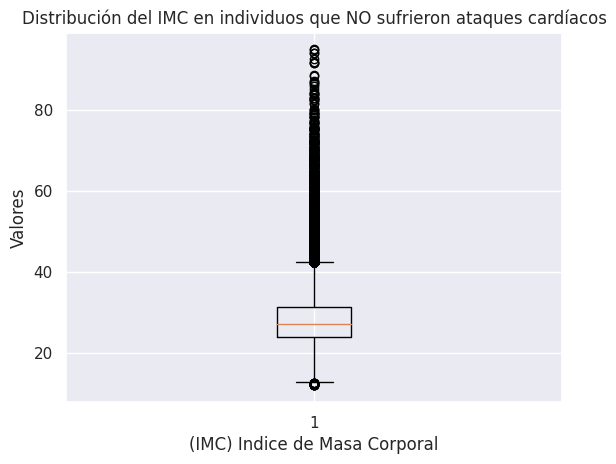

In [271]:
plt.boxplot(enc_HDNO['BMI'])
plt.xlabel('(IMC) Indice de Masa Corporal')
plt.ylabel('Valores')
plt.title('Distribución del IMC en individuos que NO sufrieron ataques cardíacos')
plt.show()

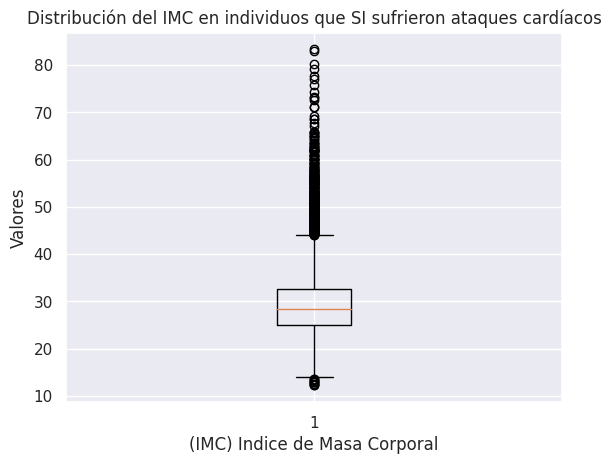

In [272]:
plt.boxplot(enc_HDYES['BMI'])
plt.xlabel('(IMC) Indice de Masa Corporal')
plt.ylabel('Valores')
plt.title('Distribución del IMC en individuos que SI sufrieron ataques cardíacos')
plt.show()

En ambos grupos se observa la existencia de valores atípicos.

La caja y bigotes en ambos casos es similar con una tendencia mayor entre 1 o 1.5 en el grupos de individuos que SI sufrieron un ataque cardíaco.

Cabe la posibilidad de que el modelo aprenda sesgadamente si se utiliza esta característica. Entonces, truncamos el DF para reducir el sesgo.

### Histograma bi-direccional para visualizar la distribución por sexo y rango etario

In [273]:
# individuos HOMBRE que NO han sufrido ataques cardíacos
enc_HDNO_MALE = pd.DataFrame(enc_HDNO)
enc_HDNO_MALE = enc_HDNO_MALE[enc_HDNO_MALE['Sex'] == 'Male']
# verificamos el resultado
enc_HDNO_MALE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
2,No,26.58,Yes,No,No,20.0,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
9,No,40.69,No,No,No,0.0,Yes,Male,65-69,White,No,Yes,Good,No,No,No
12,No,28.37,Yes,No,No,0.0,Yes,Male,75-79,White,Yes,Yes,Very good,No,No,No
17,No,22.59,Yes,No,No,0.0,Yes,Male,70-74,White,"No, borderline diabetes",Yes,Good,No,No,No
19,No,18.13,No,No,No,0.0,No,Male,80 or older,White,No,Yes,Excellent,No,No,Yes
23,No,25.82,Yes,No,No,0.0,No,Male,80 or older,White,Yes,Yes,Fair,No,No,No
27,No,31.66,Yes,No,No,5.0,No,Male,60-64,White,No,Yes,Very good,No,No,No
30,No,25.84,Yes,No,No,5.0,No,Male,70-74,Black,No,Yes,Good,No,No,No
32,No,45.35,No,No,No,30.0,Yes,Male,70-74,White,Yes,No,Good,No,No,No
41,No,28.13,No,No,No,0.0,No,Male,60-64,White,No,Yes,Excellent,No,No,No


In [274]:
# individuos MUJER que NO han sufrido ataques cardíacos
enc_HDNO_FEMALE = pd.DataFrame(enc_HDNO)
enc_HDNO_FEMALE = enc_HDNO_FEMALE[enc_HDNO_FEMALE['Sex'] == 'Female']
# verificamos el resultado
enc_HDNO_FEMALE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,No,Female,80 or older,White,No,Yes,Very good,No,No,No
3,No,24.21,No,No,No,0.0,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,23.71,No,No,No,28.0,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
6,No,21.63,No,No,No,15.0,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,26.45,No,No,No,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
11,No,28.71,Yes,No,No,0.0,No,Female,55-59,White,No,Yes,Very good,No,No,No
13,No,28.15,No,No,No,7.0,Yes,Female,80 or older,White,No,No,Good,No,No,No
14,No,29.29,Yes,No,No,0.0,Yes,Female,60-64,White,No,No,Good,No,No,No


In [275]:
# creamos un DF con individuos HOMBRE que NO han sufrido ataques cardíacos, contabilizando por intervalo de edad
enc_HDNOAgeCatMale = pd.DataFrame(enc_HDNO_MALE['AgeCategory'].value_counts().sort_index(ascending=False))
enc_HDNOAgeCatMale = enc_HDNOAgeCatMale.rename_axis('Age').reset_index()
enc_HDNOAgeCatMale.rename(columns = {'AgeCategory':'Male'}, inplace=True)
enc_HDNOAgeCatMale

,Age,Male
0,80 or older,6616
1,75-79,6885
2,70-74,10939
3,65-69,13469
4,60-64,14044
5,55-59,12976
6,50-54,11260
7,45-49,9929
8,40-44,9811
9,35-39,9944


In [276]:
# creamos un DF con individuos MUJER que NO han sufrido ataques cardíacos, contabilizando por intervalo de edad
enc_HDNOAgeCatFemale = pd.DataFrame(enc_HDNO_FEMALE['AgeCategory'].value_counts().sort_index(ascending=False))
enc_HDNOAgeCatFemale = enc_HDNOAgeCatFemale.rename_axis('Age').reset_index()
enc_HDNOAgeCatFemale.rename(columns = {'AgeCategory':'Female'}, inplace=True)
enc_HDNOAgeCatFemale

,Age,Female
0,80 or older,12088
1,75-79,10548
2,70-74,15279
3,65-69,16581
4,60-64,16315
5,55-59,14579
6,50-54,12739
7,45-49,11118
8,40-44,10709
9,35-39,10310


In [277]:
# contactenamos ambos DF
df_SEXNO = enc_HDNOAgeCatMale.merge(enc_HDNOAgeCatFemale, on='Age', how='left')
df_SEXNO.rename(columns = {'Male_x':'Male','Male_y':'Female'}, inplace=True)
df_SEXNO
#enc_HDNOAgeCatMale.merge(enc_HDNOAgeCatFemale, on='Age', how='left')

,Age,Male,Female
0,80 or older,6616,12088
1,75-79,6885,10548
2,70-74,10939,15279
3,65-69,13469,16581
4,60-64,14044,16315
5,55-59,12976,14579
6,50-54,11260,12739
7,45-49,9929,11118
8,40-44,9811,10709
9,35-39,9944,10310


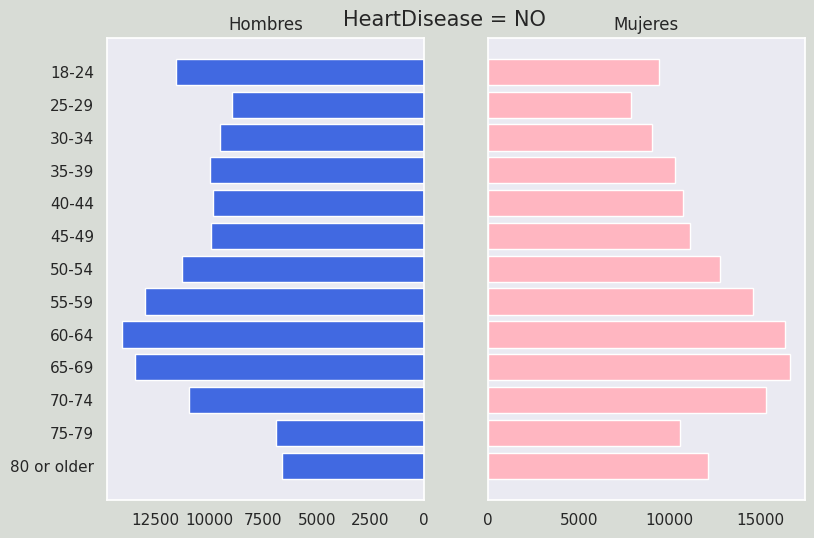

In [278]:
# cramos el histograma para individuos que NO han sufrido un ataque cardíaco, por sexo y en un intervalo determiando de edad

# definimos los límites para x and y
y = range(0, len(df_SEXNO))
x_male = df_SEXNO['Male']
x_female = df_SEXNO['Female']

# definimos los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

# especificamos el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"HeartDisease = NO", fontsize=15, ha='center')

# definimos las barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajustamos los parámetros de la cuadrícula y especificamos las etiquetas para el eje y
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_SEXNO['Age'])
axes[0].invert_xaxis()
axes[0].grid()

# mostramos el gráfico
plt.show()

In [279]:
# individuos HOMBRE que SI han sufrido ataques cardíacos
enc_HDYES_MALE = pd.DataFrame(enc_HDYES)
enc_HDYES_MALE = enc_HDYES_MALE[enc_HDYES_MALE['Sex'] == 'Male']
# verificamos el resultado
enc_HDYES_MALE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
10,Yes,34.30,Yes,No,No,30.0,Yes,Male,60-64,White,Yes,No,Poor,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,Yes,Male,75-79,White,Yes,Yes,Poor,No,No,Yes
101,Yes,24.68,Yes,No,No,30.0,Yes,Male,70-74,White,No,Yes,Fair,No,No,Yes
140,Yes,23.73,No,No,No,0.0,No,Male,75-79,White,No,Yes,Good,No,No,Yes
142,Yes,31.48,No,Yes,Yes,20.0,Yes,Male,65-69,Black,No,No,Fair,Yes,No,No
148,Yes,32.14,Yes,No,No,0.0,No,Male,75-79,White,No,Yes,Good,Yes,No,Yes
183,Yes,35.15,Yes,No,No,0.0,No,Male,70-74,White,No,Yes,Good,No,No,No
184,Yes,25.80,Yes,No,No,7.0,Yes,Male,80 or older,White,No,No,Fair,Yes,Yes,Yes
217,Yes,28.41,Yes,No,No,10.0,Yes,Male,65-69,White,No,Yes,Fair,No,Yes,No
245,Yes,32.98,No,No,No,0.0,No,Male,65-69,Black,Yes,Yes,Good,No,No,No


In [280]:
# individuos MUJER que SI han sufrido ataques cardíacos
enc_HDYES_FEMALE = pd.DataFrame(enc_HDYES)
enc_HDYES_FEMALE = enc_HDYES_FEMALE[enc_HDYES_FEMALE['Sex'] == 'Female']
# verificamos el resultado
enc_HDYES_FEMALE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,Yes,Female,75-79,Black,No,No,Fair,No,No,No
42,Yes,25.06,No,No,No,0.0,Yes,Female,80 or older,White,Yes,No,Good,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,Yes,Female,75-79,White,Yes,Yes,Fair,No,Yes,No
45,Yes,20.37,Yes,No,No,3.0,No,Female,70-74,White,No,No,Poor,No,No,No
77,Yes,34.33,No,No,No,0.0,No,Female,55-59,White,No,Yes,Good,No,No,No
78,Yes,28.29,Yes,No,No,30.0,No,Female,70-74,White,Yes,Yes,Poor,No,Yes,No
127,Yes,33.65,No,No,No,2.0,Yes,Female,70-74,White,Yes,No,Fair,No,No,No
129,Yes,25.06,No,No,No,2.0,No,Female,60-64,White,Yes,Yes,Very good,No,No,Yes
131,Yes,37.59,Yes,No,No,0.0,No,Female,70-74,White,No,No,Poor,No,No,No
141,Yes,29.29,Yes,No,No,0.0,Yes,Female,70-74,Other,No,Yes,Very good,Yes,No,Yes


In [281]:
# creamos un DF con individuos HOMBRE que SI han sufrido ataques cardíacos, contabilizando por intervalo de edad
enc_HDYESAgeCatMale = pd.DataFrame(enc_HDYES_MALE['AgeCategory'].value_counts().sort_index(ascending=False))
enc_HDYESAgeCatMale = enc_HDYESAgeCatMale.rename_axis('Age').reset_index()
enc_HDYESAgeCatMale.rename(columns = {'AgeCategory':'Male'}, inplace=True)
enc_HDYESAgeCatMale

,Age,Male
0,80 or older,2821
1,75-79,2407
2,70-74,3037
3,65-69,2634
4,60-64,2070
5,55-59,1294
6,50-54,787
7,45-49,424
8,40-44,243
9,35-39,148


In [282]:
# creamos un DF con individuos MUJER que SI han sufrido ataques cardíacos, contabilizando por intervalo de edad
enc_HDYESAgeCatFemale = pd.DataFrame(enc_HDYES_FEMALE['AgeCategory'].value_counts().sort_index(ascending=False))
enc_HDYESAgeCatFemale = enc_HDYESAgeCatFemale.rename_axis('Age').reset_index()
enc_HDYESAgeCatFemale.rename(columns = {'AgeCategory':'Female'}, inplace=True)
enc_HDYESAgeCatFemale

,Age,Female
0,80 or older,2628
1,75-79,1642
2,70-74,1810
3,65-69,1467
4,60-64,1257
5,55-59,908
6,50-54,596
7,45-49,320
8,40-44,243
9,35-39,148


In [283]:
# contactenamos ambos DF
df_SEXYES = enc_HDYESAgeCatMale.merge(enc_HDYESAgeCatFemale, on='Age', how='left')
df_SEXYES.rename(columns = {'Male_x':'Male','Male_y':'Female'}, inplace=True)
df_SEXYES
#enc_HDNOAgeCatMale.merge(enc_HDNOAgeCatFemale, on='Age', how='left')

,Age,Male,Female
0,80 or older,2821,2628
1,75-79,2407,1642
2,70-74,3037,1810
3,65-69,2634,1467
4,60-64,2070,1257
5,55-59,1294,908
6,50-54,787,596
7,45-49,424,320
8,40-44,243,243
9,35-39,148,148


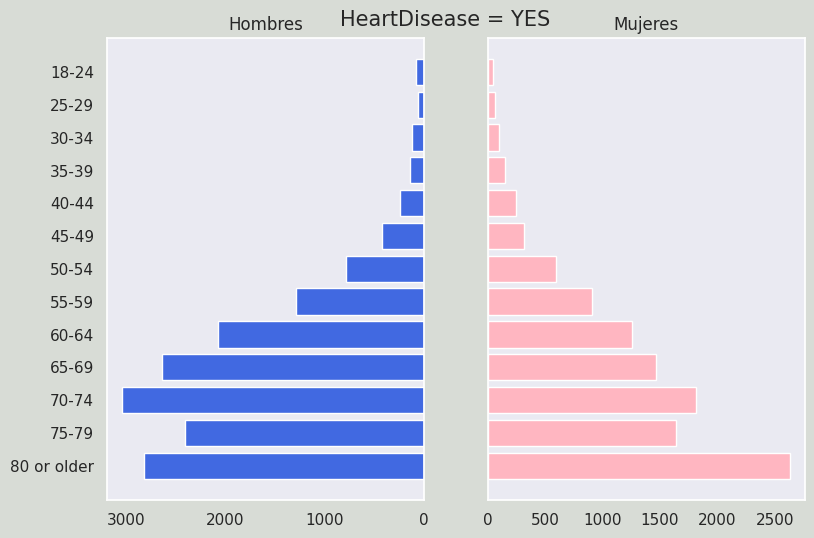

In [284]:
# cramos el histograma para individuos que SI han sufrido un ataque cardíaco, por sexo y en un intervalo determiando de edad

# definimos los límites para x and y
y = range(0, len(df_SEXYES))
x_male = df_SEXYES['Male']
x_female = df_SEXYES['Female']

# definimos los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

# especificamos el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"HeartDisease = YES", fontsize=15, ha='center')

# definimos las barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajustamos los parámetros de la cuadrícula y especificamos las etiquetas para el eje y
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_SEXYES['Age'])
axes[0].invert_xaxis()
axes[0].grid()

# mostramos el gráfico
plt.show()

En el grupo de individuos que NO han sufrido un ataque cardíaco no se observa un patron relevante.
Pero en el grupo de individuos que SI han sufrido un ataque cardíaco se observa lo siguiente:
* el patron es similar en ambos sexos
* en ambos sexos, a mayor edad aumenta la posibilidad de sufrir un ataque cardíaco
* se destaca que las mujeres tienen mas posibilidades respecto de los hombres, a paritr de los 80 años de edad, de sufrir un ataque cardíaco.

**A partir de aquí solo buscaremos patrones evaluando solo a los individuos que SI han sufrido un ataque cardíaco.**

### Gráfico de torta para visualizar la distribución por sexo y raza

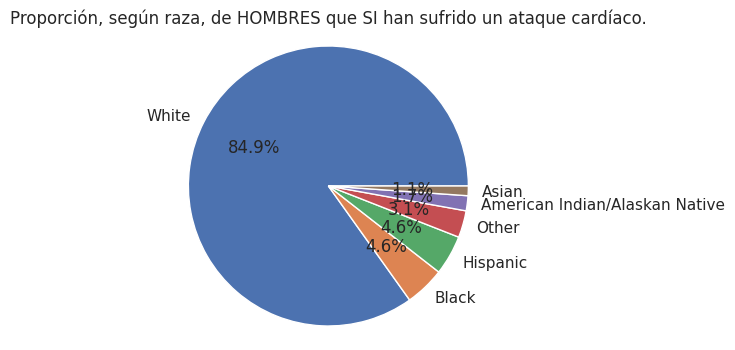

In [285]:
# cramos un gráfico de torta para individuos MASCULINOS que SI han sufrido un ataque cardíaco, por raza
enc_HDYES_MALE_RACE = enc_HDYES_MALE['Race'].value_counts() / len(enc_HDYES_MALE) * 100
plt.figure(figsize=(5, 4))
plt.pie(enc_HDYES_MALE_RACE.values, labels=enc_HDYES_MALE_RACE.index, autopct='%1.1f%%')
plt.title('Proporción, según raza, de HOMBRES que SI han sufrido un ataque cardíaco.')
plt.axis('equal')
plt.show()

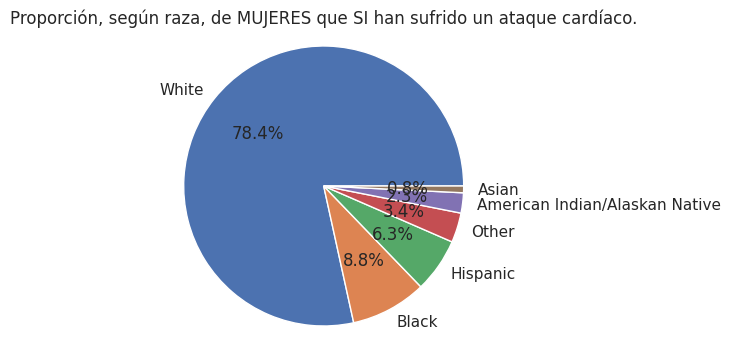

In [286]:
# cramos un gráfico de torta para individuos FEMENINAS que SI han sufrido un ataque cardíaco, por raza
enc_HDYES_FEMALE_RACE = enc_HDYES_FEMALE['Race'].value_counts() / len(enc_HDYES_FEMALE) * 100
plt.figure(figsize=(5, 4))
plt.pie(enc_HDYES_FEMALE_RACE.values, labels=enc_HDYES_FEMALE_RACE.index, autopct='%1.1f%%')
plt.title('Proporción, según raza, de MUJERES que SI han sufrido un ataque cardíaco.')
plt.axis('equal')
plt.show()

Considero valoraciones relativas ya que la muestra no fue tomada en cantidad igual de individuos para cada raza.
En ambos casos las proporciones similares, observandose una proporción mayor en HOMBRES BLANCOS respecto a al conjunto de MUJERES. Y en el caso de las MUJERES, una proporciòn mayor en individuos NEGROS e HISPANOS respecto al conjunto de HOMBRES.

### Gráfico de barras apiladas para visualizar la incidencia del sexo, rango etario y hábitos

In [287]:
# creaoms un DF solo con los datos que vamos a usar en el gráfico (HOMBRES que si han sufrido un ataque cardíaco y los datos de sus hábitos, por rango de edad)
df_HDYES_MALE_habitos = enc_HDYES_MALE.drop(['HeartDisease', 'Sex', 'BMI', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Race', 'Diabetic', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer' ], axis=1)
df_HDYES_MALE_habitos = df_HDYES_MALE_habitos.sort_values('AgeCategory')
df_HDYES_MALE_habitos = df_HDYES_MALE_habitos[['AgeCategory', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity']]
df_HDYES_MALE_habitos = df_HDYES_MALE_habitos.reset_index()
df_HDYES_MALE_habitos = df_HDYES_MALE_habitos.drop(columns = ['index'])
df_HDYES_MALE_habitos.head(5)

,AgeCategory,Smoking,AlcoholDrinking,PhysicalActivity
0,18-24,Yes,No,Yes
1,18-24,No,No,Yes
2,18-24,Yes,No,Yes
3,18-24,No,No,Yes
4,18-24,No,No,Yes


In [288]:
# creaoms un DF solo con los datos que vamos a usar en el gráfico (MUJERES que si han sufrido un ataque cardíaco y los datos de sus hábitos, por rango de edad)
df_HDYES_FEMALE_habitos = enc_HDYES_FEMALE.drop(['HeartDisease', 'Sex', 'BMI', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Race', 'Diabetic', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer' ], axis=1)
df_HDYES_FEMALE_habitos = df_HDYES_FEMALE_habitos.sort_values('AgeCategory')
df_HDYES_FEMALE_habitos = df_HDYES_FEMALE_habitos[['AgeCategory', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity']]
df_HDYES_FEMALE_habitos = df_HDYES_FEMALE_habitos.reset_index()
df_HDYES_FEMALE_habitos = df_HDYES_FEMALE_habitos.drop(columns = ['index'])
df_HDYES_FEMALE_habitos.head(5)

,AgeCategory,Smoking,AlcoholDrinking,PhysicalActivity
0,18-24,No,Yes,No
1,18-24,No,No,Yes
2,18-24,No,Yes,Yes
3,18-24,No,No,Yes
4,18-24,Yes,No,Yes


In [289]:
# creamos un DF HOMBRES donde iremos almacenando los contadores de cada hábito por rango de edad
tabla_HDYES_MALE_h = pd.DataFrame(df_HDYES_MALE_habitos['AgeCategory'].value_counts().sort_index(ascending=True))
tabla_HDYES_MALE_h.rename(columns = {'AgeCategory':'TOTAL'}, inplace=True)
tabla_HDYES_MALE_h.rename(columns = {0:'AgeCategory'}, inplace=True)
tabla_HDYES_MALE_h = tabla_HDYES_MALE_h.rename_axis('AgeCategory').reset_index()
tabla_HDYES_MALE_h

,AgeCategory,TOTAL
0,18-24,80
1,25-29,67
2,30-34,127
3,35-39,148
4,40-44,243
5,45-49,424
6,50-54,787
7,55-59,1294
8,60-64,2070
9,65-69,2634


In [290]:
# creamos un DF para MUJERES donde iremos almacenando los contadores de cada hábito por rango de edad
tabla_HDYES_FEMALE_h = pd.DataFrame(df_HDYES_FEMALE_habitos['AgeCategory'].value_counts().sort_index(ascending=True))
tabla_HDYES_FEMALE_h.rename(columns = {'AgeCategory':'TOTAL'}, inplace=True)
tabla_HDYES_FEMALE_h.rename(columns = {0:'AgeCategory'}, inplace=True)
tabla_HDYES_FEMALE_h = tabla_HDYES_FEMALE_h.rename_axis('AgeCategory').reset_index()
tabla_HDYES_FEMALE_h

,AgeCategory,TOTAL
0,18-24,50
1,25-29,66
2,30-34,99
3,35-39,148
4,40-44,243
5,45-49,320
6,50-54,596
7,55-59,908
8,60-64,1257
9,65-69,1467


In [291]:
# contabilizamos los casos totales de HOMBRES por SI y por NO para cada rango de edad y hábito
temp = pd.DataFrame(df_HDYES_MALE_habitos)
for x in range(len(tabla_HDYES_MALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'Smoking'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'Smoking'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_MALE_h.loc[x, 'Smoking_YES']=COUNT_YES
  tabla_HDYES_MALE_h.loc[x, 'Smoking_NO']=COUNT_NO

for x in range(len(tabla_HDYES_MALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'AlcoholDrinking'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'AlcoholDrinking'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_MALE_h.loc[x, 'AlcoholDrinking_YES']=COUNT_YES
  tabla_HDYES_MALE_h.loc[x, 'AlcoholDrinking_NO']=COUNT_NO

for x in range(len(tabla_HDYES_MALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'PhysicalActivity'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_MALE_h.loc[x,'AgeCategory'] and temp.loc[y,'PhysicalActivity'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_MALE_h.loc[x, 'PhysicalActivity_YES']=COUNT_YES
  tabla_HDYES_MALE_h.loc[x, 'PhysicalActivity_NO']=COUNT_NO

tabla_HDYES_MALE_h

,AgeCategory,TOTAL,Smoking_YES,Smoking_NO,AlcoholDrinking_YES,AlcoholDrinking_NO,PhysicalActivity_YES,PhysicalActivity_NO
0,18-24,80,22.0,58.0,6.0,74.0,66.0,14.0
1,25-29,67,35.0,32.0,11.0,56.0,52.0,15.0
2,30-34,127,83.0,44.0,16.0,111.0,100.0,27.0
3,35-39,148,100.0,48.0,16.0,132.0,113.0,35.0
4,40-44,243,162.0,81.0,24.0,219.0,183.0,60.0
5,45-49,424,269.0,155.0,23.0,401.0,282.0,142.0
6,50-54,787,484.0,303.0,64.0,723.0,504.0,283.0
7,55-59,1294,797.0,497.0,80.0,1214.0,875.0,419.0
8,60-64,2070,1290.0,780.0,105.0,1965.0,1417.0,653.0
9,65-69,2634,1637.0,997.0,109.0,2525.0,1865.0,769.0


In [292]:
# contabilizamos los casos totales de MUJERES por SI y por NO para cada rango de edad y hábito
temp = pd.DataFrame(df_HDYES_FEMALE_habitos)
for x in range(len(tabla_HDYES_FEMALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'Smoking'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'Smoking'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_FEMALE_h.loc[x, 'Smoking_YES']=COUNT_YES
  tabla_HDYES_FEMALE_h.loc[x, 'Smoking_NO']=COUNT_NO

for x in range(len(tabla_HDYES_FEMALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'AlcoholDrinking'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'AlcoholDrinking'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_FEMALE_h.loc[x, 'AlcoholDrinking_YES']=COUNT_YES
  tabla_HDYES_FEMALE_h.loc[x, 'AlcoholDrinking_NO']=COUNT_NO

for x in range(len(tabla_HDYES_FEMALE_h)):
  COUNT_YES=0
  COUNT_NO=0
  for y in range(len(temp)):
    if temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'PhysicalActivity'] == 'Yes':
      COUNT_YES=COUNT_YES+1
    elif temp.loc[y,'AgeCategory'] == tabla_HDYES_FEMALE_h.loc[x,'AgeCategory'] and temp.loc[y,'PhysicalActivity'] == 'No':
      COUNT_NO=COUNT_NO+1
  tabla_HDYES_FEMALE_h.loc[x, 'PhysicalActivity_YES']=COUNT_YES
  tabla_HDYES_FEMALE_h.loc[x, 'PhysicalActivity_NO']=COUNT_NO

tabla_HDYES_FEMALE_h

,AgeCategory,TOTAL,Smoking_YES,Smoking_NO,AlcoholDrinking_YES,AlcoholDrinking_NO,PhysicalActivity_YES,PhysicalActivity_NO
0,18-24,50,10.0,40.0,3.0,47.0,39.0,11.0
1,25-29,66,24.0,42.0,5.0,61.0,49.0,17.0
2,30-34,99,50.0,49.0,5.0,94.0,74.0,25.0
3,35-39,148,82.0,66.0,9.0,139.0,106.0,42.0
4,40-44,243,157.0,86.0,17.0,226.0,163.0,80.0
5,45-49,320,196.0,124.0,20.0,300.0,185.0,135.0
6,50-54,596,349.0,247.0,39.0,557.0,313.0,283.0
7,55-59,908,570.0,338.0,58.0,850.0,481.0,427.0
8,60-64,1257,749.0,508.0,48.0,1209.0,723.0,534.0
9,65-69,1467,818.0,649.0,64.0,1403.0,857.0,610.0


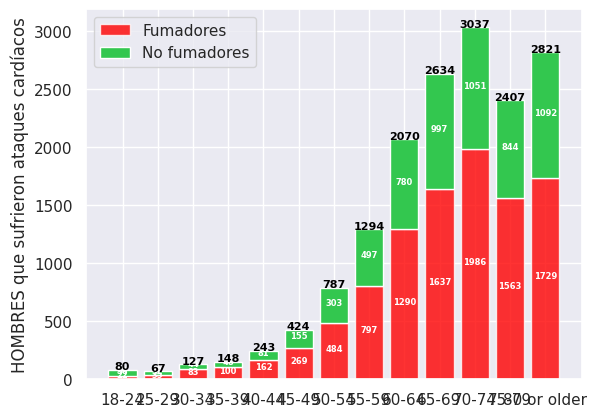

In [293]:
# generamos el grafico de barras apiladas para HOMBRES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si son o no fumadores
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['Smoking_YES'], color = "#ff0000", alpha = 0.8, label = "Fumadores")
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['Smoking_NO'], bottom = tabla_HDYES_MALE_h['Smoking_YES'], color = "#33c74f", alpha = 1.0, label = "No fumadores")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_MALE_h['Smoking_YES'], tabla_HDYES_MALE_h['Smoking_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('HOMBRES que sufrieron ataques cardíacos')
plt.show()


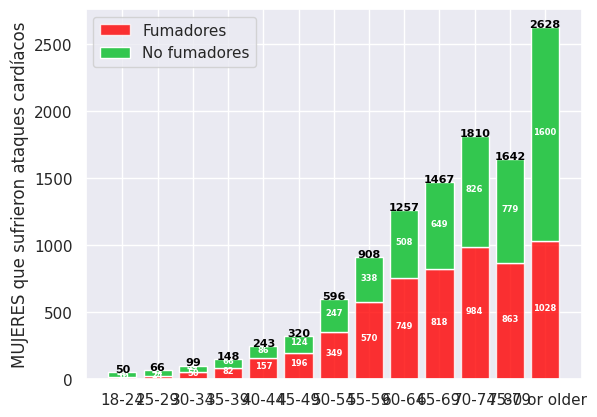

In [294]:
# generamos el grafico de barras apiladas para MUJERES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si son o no fumadores
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['Smoking_YES'], color = "#ff0000", alpha = 0.8, label = "Fumadores")
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['Smoking_NO'], bottom = tabla_HDYES_FEMALE_h['Smoking_YES'], color = "#33c74f", alpha = 1.0, label = "No fumadores")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_FEMALE_h['Smoking_YES'], tabla_HDYES_FEMALE_h['Smoking_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('MUJERES que sufrieron ataques cardíacos')
plt.show()

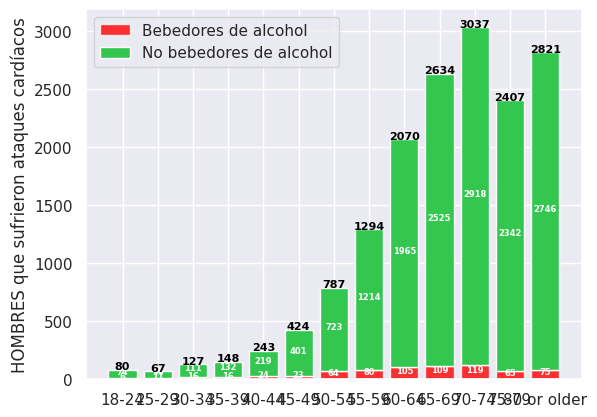

In [295]:
# generamos el grafico de barras apiladas para HOMBRES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si son o no bebedores de alcohol
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['AlcoholDrinking_YES'], color = "#ff0000", alpha = 0.8, label = "Bebedores de alcohol")
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['AlcoholDrinking_NO'], bottom = tabla_HDYES_MALE_h['AlcoholDrinking_YES'], color = "#33c74f", alpha = 1.0, label = "No bebedores de alcohol")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_MALE_h['AlcoholDrinking_YES'], tabla_HDYES_MALE_h['AlcoholDrinking_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('HOMBRES que sufrieron ataques cardíacos')
plt.show()

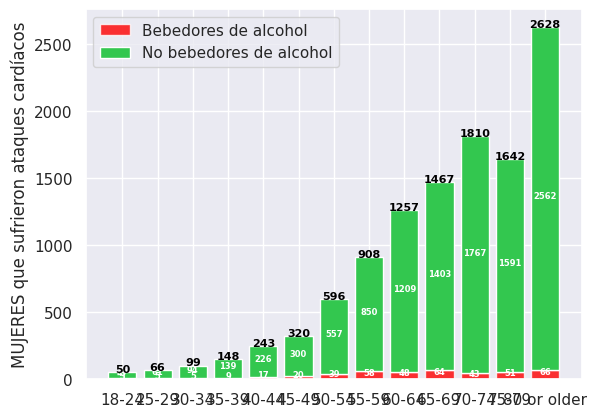

In [296]:
# generamos el grafico de barras apiladas para MUJERES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si son o no bebedores de alcohol
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['AlcoholDrinking_YES'], color = "#ff0000", alpha = 0.8, label = "Bebedores de alcohol")
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['AlcoholDrinking_NO'], bottom = tabla_HDYES_FEMALE_h['AlcoholDrinking_YES'], color = "#33c74f", alpha = 1.0, label = "No bebedores de alcohol")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_FEMALE_h['AlcoholDrinking_YES'], tabla_HDYES_FEMALE_h['AlcoholDrinking_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('MUJERES que sufrieron ataques cardíacos')
plt.show()

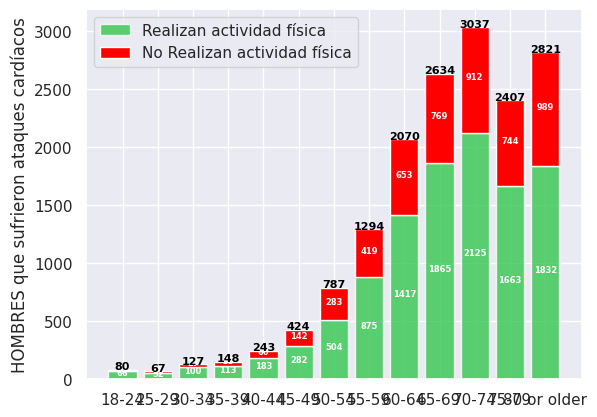

In [297]:
# generamos el grafico de barras apiladas para HOMBRES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si realizan o no actividad física
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['PhysicalActivity_YES'], color = "#33c74f", alpha = 0.8, label = "Realizan actividad física")
ax.bar(tabla_HDYES_MALE_h['AgeCategory'], tabla_HDYES_MALE_h['PhysicalActivity_NO'], bottom = tabla_HDYES_MALE_h['PhysicalActivity_YES'], color = "#ff0000", alpha = 1.0, label = "No Realizan actividad física")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_MALE_h['PhysicalActivity_YES'], tabla_HDYES_MALE_h['PhysicalActivity_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('HOMBRES que sufrieron ataques cardíacos')
plt.show()

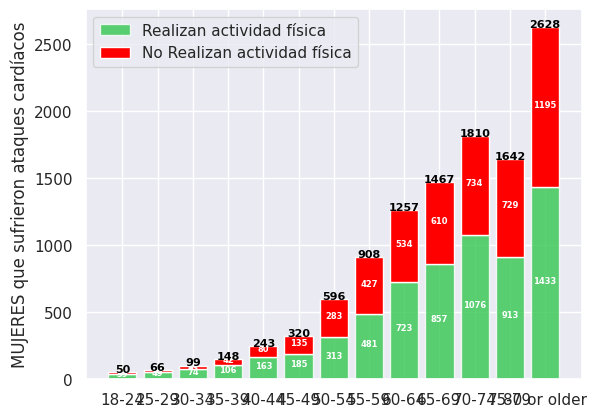

In [298]:
# generamos el grafico de barras apiladas para MUJERES que han sufrido ataques cardíacos, segmentando por rango de edad, e indicaondo en cada intervalo si realizan o no actividad física
fig, ax = plt.subplots()
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['PhysicalActivity_YES'], color = "#33c74f", alpha = 0.8, label = "Realizan actividad física")
ax.bar(tabla_HDYES_FEMALE_h['AgeCategory'], tabla_HDYES_FEMALE_h['PhysicalActivity_NO'], bottom = tabla_HDYES_FEMALE_h['PhysicalActivity_YES'], color = "#ff0000", alpha = 1.0, label = "No Realizan actividad física")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 6)

total_values = np.add(tabla_HDYES_FEMALE_h['PhysicalActivity_YES'], tabla_HDYES_FEMALE_h['PhysicalActivity_NO'])
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 8)

ax.legend(loc = 'upper left')
ax.set_ylabel('MUJERES que sufrieron ataques cardíacos')
plt.show()

Tanto en el caso de HOMBRES como MUJERES, se observa que:
* Mas de la mitad de individuos que sufrieron atques cardíacos son fumadores y/o bebedores de alcohol. Esta incidencia es mas marcada en el caso de los HOMBRES.
* Por otro lado,  Mas de la mitad de individuos que sufrieron atques cardíacos realizan actividad física. Esta incidencia también es mas marcada en el caso de los HOMBRES.

### Gráfico para visualizar la incidencia del sexo, rango etario y afecciones

*pendiente...*

# **SELECCIÓN DE CARACTERÍSTICAS** (utilizando variables cuantitativas)


In [7]:
# creamos un nuevo DF para la selección de caracterìsitcas
df_data = pd.read_csv('/content/drive/MyDrive/UTN/TIF/HeartDisease.csv')
df_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
# para realizar la práctica utilizaremos las variables numéricas, eliminamos las demás columnas (excepto la columna que dinica si el paciente sufrió o no un aqtaque cardíaco), dejando solo las variables numéricas
df = df_data.drop(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
df = df.reindex(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease'], axis=1)

# convertimos "Yes" en 1 y "No" en 0 para la variable dependiente
df['HeartDisease'] = df['HeartDisease'].map({'Yes':1,'No':0})

df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,0
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,0
3,24.21,0.0,0.0,6.0,0
4,23.71,28.0,0.0,8.0,0
...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1
319791,29.84,0.0,0.0,5.0,0
319792,24.24,0.0,0.0,6.0,0
319793,32.81,0.0,0.0,12.0,0


VISUALIZAMOS Y TRUNCAMOS LOS OUTLIERS DE LAS COLUMNAS QUE UTILIZAREMOS

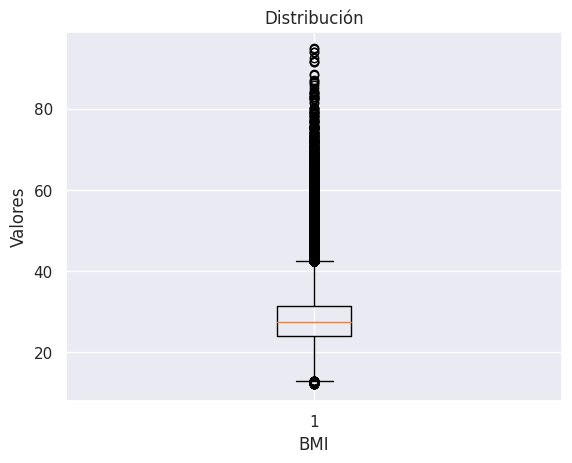

In [466]:
# BOXPLOT para caracaterística BMI
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-467-da0168acd6d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

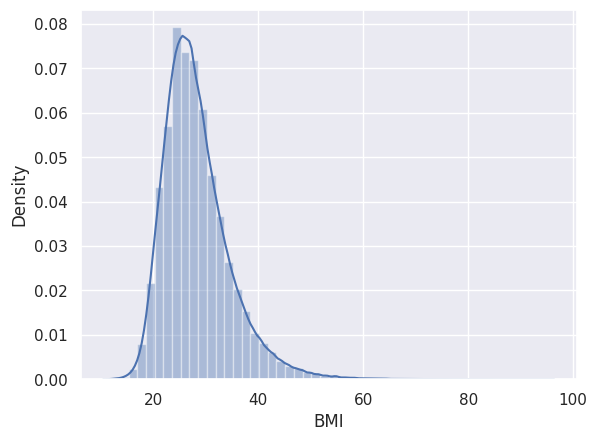

In [467]:
# DISPLOT para caracaterística BMI
sns.distplot(df['BMI'])

In [468]:
# calculamos los percentiles 1 y 99 de la columna "BMI"
p1 = df['BMI'].quantile(0.01)
p99 = df['BMI'].quantile(0.99)

# truncamos los outliers en la columna "BMI"
df['BMI'] = df['BMI'].clip(lower=p1, upper=p99)

# ya podemos utilizar el DataFrame 'df' con los outliers tratados para esta columna

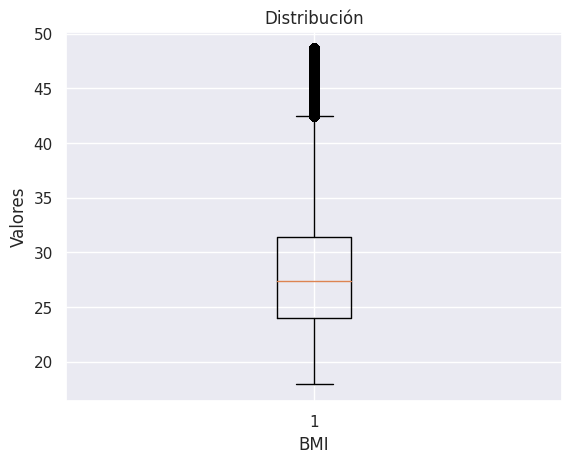

In [469]:
# BOXPLOT para caracaterística BMI
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-470-da0168acd6d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

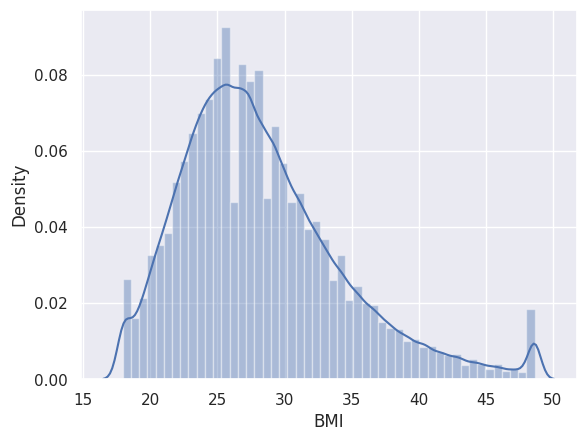

In [470]:
# DISPLOT para caracaterística BMI
sns.distplot(df['BMI'])

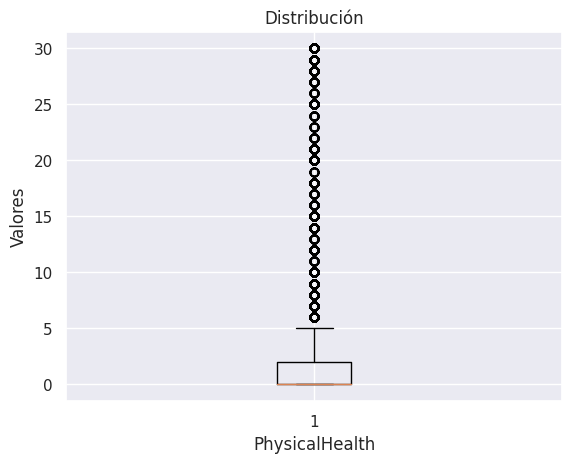

In [471]:
# BOXPLOT para caracaterística PhysicalHealth
plt.boxplot(df['PhysicalHealth'])
plt.xlabel('PhysicalHealth')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-472-7baa0708f768>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PhysicalHealth'])


<Axes: xlabel='PhysicalHealth', ylabel='Density'>

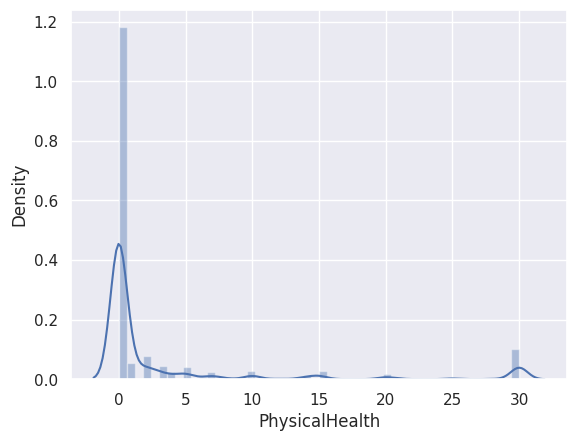

In [472]:
# DISPLOT para caracaterística PhysicalHealth
sns.distplot(df['PhysicalHealth'])

In [473]:
# calculamos los percentiles 1 y 99 de la columna "PhysicalHealth"
p1 = df['PhysicalHealth'].quantile(0.01)
p99 = df['PhysicalHealth'].quantile(0.99)

# truncamos los outliers en la columna "PhysicalHealth"
df['BMI'] = df['PhysicalHealth'].clip(lower=p1, upper=p99)

# ya podemos utilizar el DataFrame 'df' con los outliers tratados para esta columna

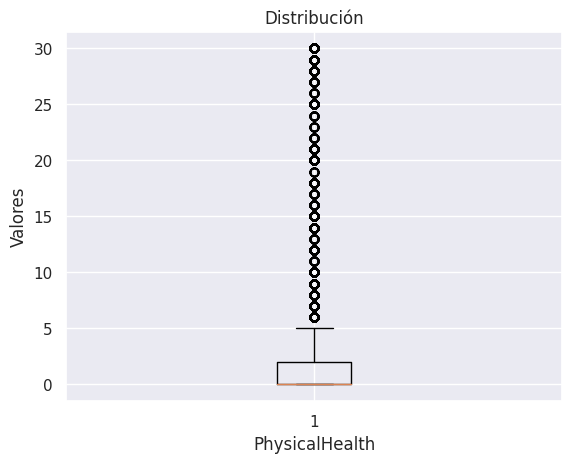

In [474]:
# BOXPLOT para caracaterística PhysicalHealth
plt.boxplot(df['PhysicalHealth'])
plt.xlabel('PhysicalHealth')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-475-7baa0708f768>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PhysicalHealth'])


<Axes: xlabel='PhysicalHealth', ylabel='Density'>

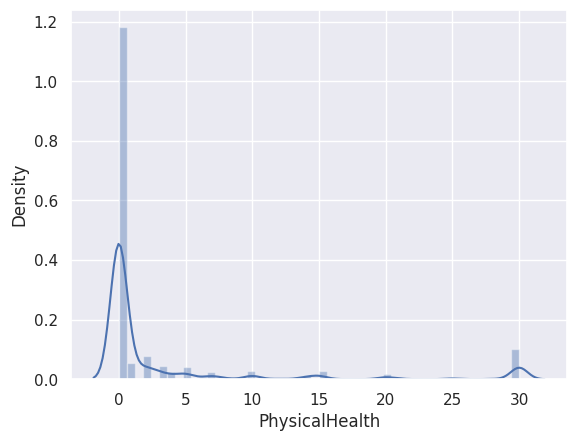

In [475]:
# DISPLOT para caracaterística PhysicalHealth
sns.distplot(df['PhysicalHealth'])

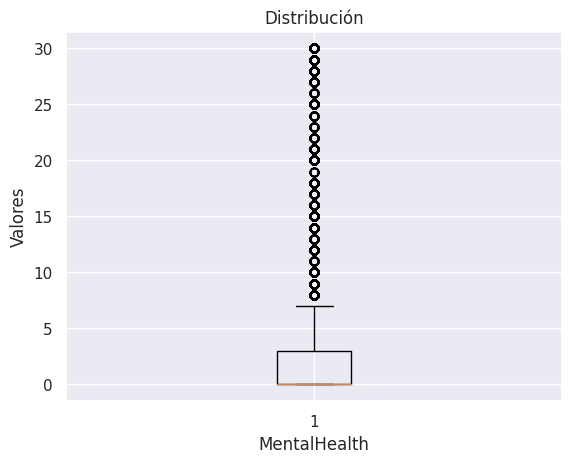

In [476]:
# BOXPLOT para caracaterística MentalHealth
plt.boxplot(df['MentalHealth'])
plt.xlabel('MentalHealth')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-477-e8652f971e71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MentalHealth'])


<Axes: xlabel='MentalHealth', ylabel='Density'>

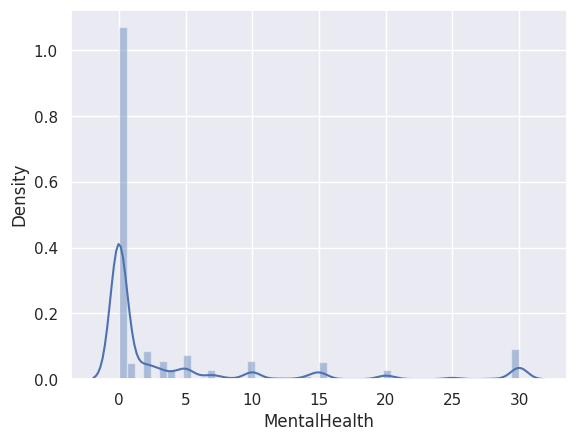

In [477]:
# DISPLOT para caracaterística MentalHealth
sns.distplot(df['MentalHealth'])

In [478]:
# calculamos los percentiles 1 y 99 de la columna "MentalHealth"
p1 = df['MentalHealth'].quantile(0.01)
p99 = df['MentalHealth'].quantile(0.99)

# truncamos los outliers en la columna "MentalHealth,"
df['MentalHealth'] = df['MentalHealth'].clip(lower=p1, upper=p99)

# ya podemos utilizar el DataFrame 'df' con los outliers tratados para esta columna

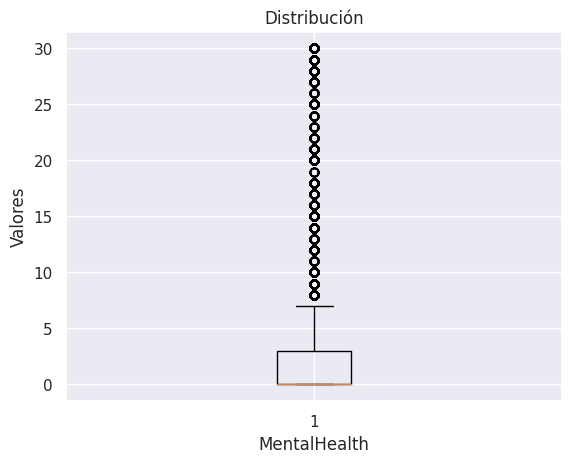

In [479]:
# BOXPLOT para caracaterística MentalHealth
plt.boxplot(df['MentalHealth'])
plt.xlabel('MentalHealth')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-480-e8652f971e71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MentalHealth'])


<Axes: xlabel='MentalHealth', ylabel='Density'>

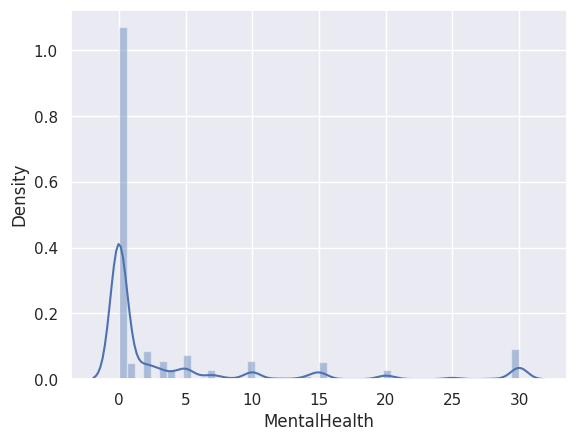

In [480]:
# DISPLOT para caracaterística MentalHealth
sns.distplot(df['MentalHealth'])

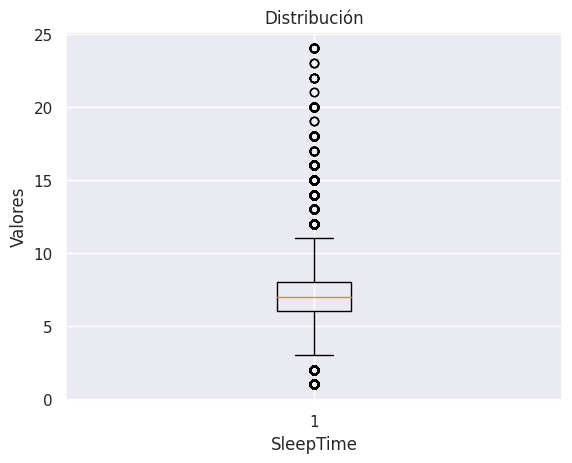

In [481]:
# BOXPLOT para caracaterística SleepTime
plt.boxplot(df['SleepTime'])
plt.xlabel('SleepTime')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-482-b013a821da84>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SleepTime'])


<Axes: xlabel='SleepTime', ylabel='Density'>

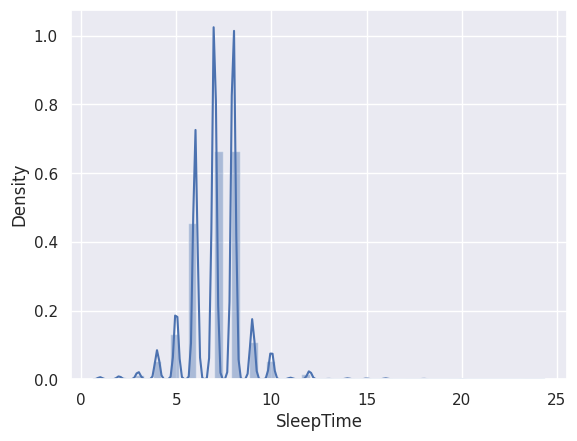

In [482]:
# DISPLOT para caracaterística SleepTime
sns.distplot(df['SleepTime'])

In [483]:
# calculamos los percentiles 1 y 99 de la columna "SleepTime"
p1 = df['SleepTime'].quantile(0.01)
p99 = df['SleepTime'].quantile(0.99)

# truncamos los outliers en la columna "SleepTime"
df['SleepTime'] = df['SleepTime'].clip(lower=p1, upper=p99)

# ya podemos utilizar el DataFrame 'df' con los outliers tratados para esta columna

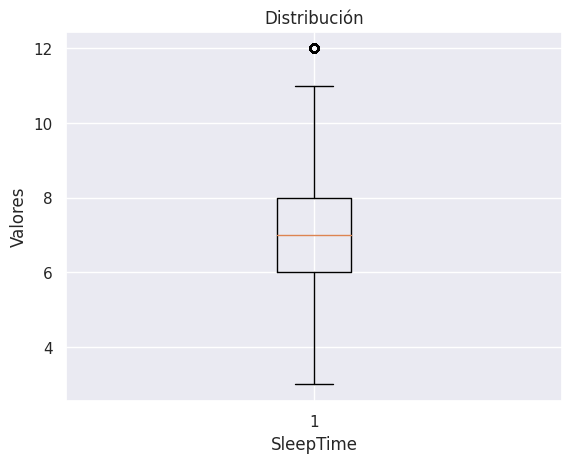

In [484]:
# BOXPLOT para caracaterística SleepTime
plt.boxplot(df['SleepTime'])
plt.xlabel('SleepTime')
plt.ylabel('Valores')
plt.title('Distribución')
plt.show()

<ipython-input-485-b013a821da84>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SleepTime'])


<Axes: xlabel='SleepTime', ylabel='Density'>

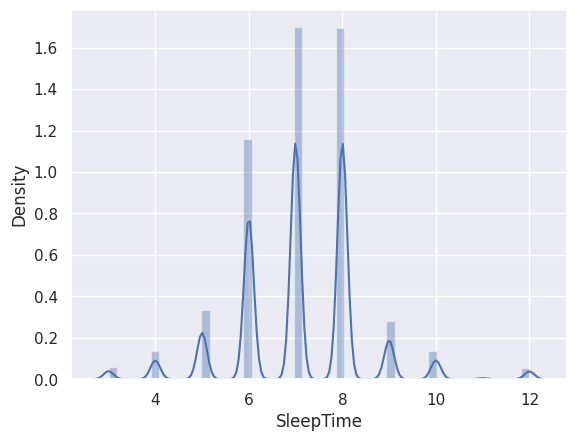

In [485]:
# DISPLOT para caracaterística SleepTime
sns.distplot(df['SleepTime'])

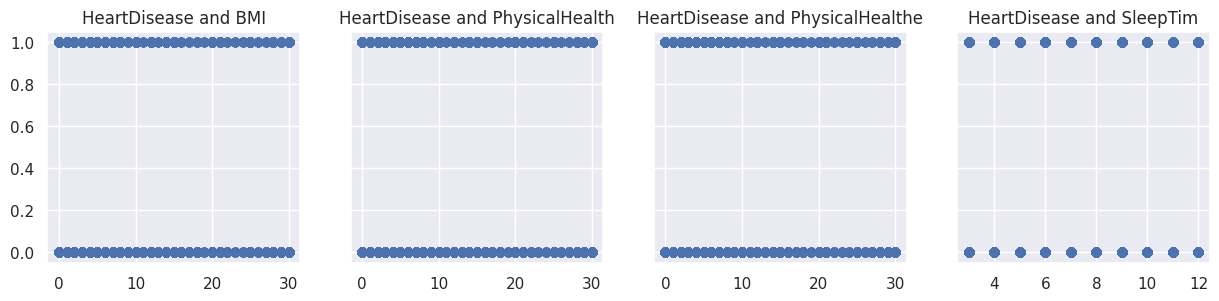

In [486]:
#comparamos variables graficamente
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['BMI'],df['HeartDisease'])
ax1.set_title('HeartDisease and BMI')
ax2.scatter(df['PhysicalHealth'],df['HeartDisease'])
ax2.set_title('HeartDisease and PhysicalHealth')
ax3.scatter(df['PhysicalHealth'],df['HeartDisease'])
ax3.set_title('HeartDisease and PhysicalHealthe')
ax4.scatter(df['SleepTime'],df['HeartDisease'])
ax4.set_title('HeartDisease and SleepTim')
plt.show()


Debemos considrear que la variable objetivo es binaria y las vrables independientes parecen no ser determinantes.

**Coeficiente de correlación**

In [487]:
# calculamos la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
correlation_matrix

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
BMI,1.000000,1.000000,0.287987,-0.071600,0.170721
PhysicalHealth,1.000000,1.000000,0.287987,-0.071600,0.170721
MentalHealth,0.287987,0.287987,1.000000,-0.131828,0.028591
SleepTime,-0.071600,-0.071600,-0.131828,1.000000,0.006626
HeartDisease,0.170721,0.170721,0.028591,0.006626,1.000000


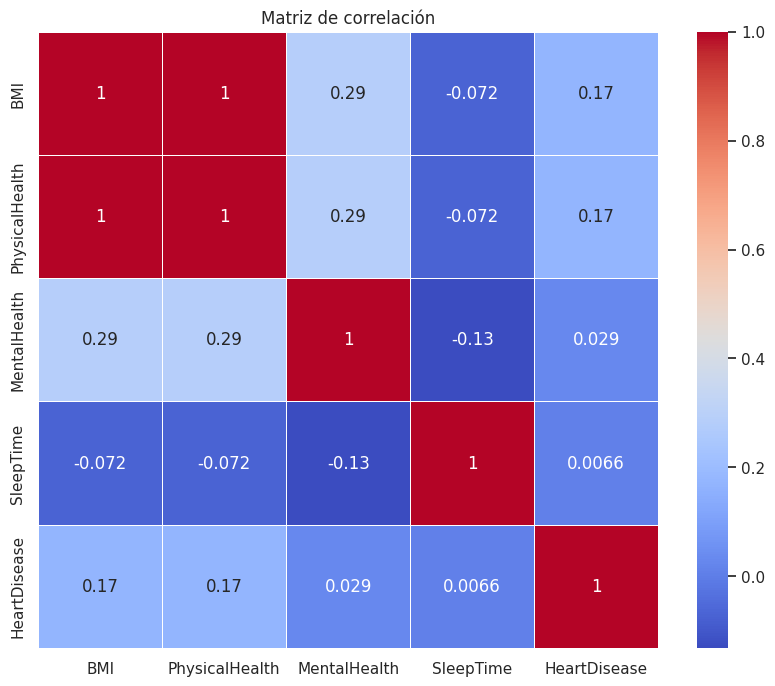

In [488]:
# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [489]:
# filtramos las características con correlación mayor a 0.1 con respecto a "HeartDisease"
selected_features = correlation_matrix[abs(correlation_matrix['HeartDisease']) > 0.05]['HeartDisease']
selected_features

BMI               0.170721
PhysicalHealth    0.170721
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

La matriz nos indica que las variables "BMI" y "PhysicalHealth" tienen el coeficiente mas alto, es decir, serían las variables de mayor incidencia.

**Backword**

In [490]:
# utilizamos la función para realizar Backward Elimination
def backward_elimination(data, target_column, significance_level=0.010):
    features = data.drop(target_column, axis=1)
    target = data[target_column]
    num_features = len(features.columns)
    while True:
        model = sm.OLS(target, features).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            max_feature_idx = model.pvalues.idxmax()
            features = features.drop(max_feature_idx, axis=1)
        else:
            break
    return features

# aplicamos Backward Elimination al DataFrame
selected_features = backward_elimination(df, target_column='HeartDisease')

# Mostrar las características seleccionadas
print("Características seleccionadas:", selected_features.columns)

Características seleccionadas: Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


Todas las columnas utilizadas, segùn Backword, deberían ser conservardas en el modelo.

**Selección Univariable**

In [491]:
# separamos las características y variable objetivo
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# aplicamos la selección univariante
selector = SelectKBest(score_func=f_classif, k=2)  # Seleccionar 2 características
X_selected = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['BMI', 'PhysicalHealth'], dtype='object')


Las caracterísitcas con mayor inferencia, según la selección univariable, son "BMI" y 'PhysicalHealth'.

**Eliminación recursiva de caracteristicas**

In [492]:
# separamos las características y variable objetivo
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# creamos el modelo que se utilizará para evaluar la importancia de las características
model = LogisticRegression()

# aplicamos eliminación recursiva de características
rfe = RFE(estimator=model, n_features_to_select=2)  # Seleccionar 2 características
X_selected = rfe.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['PhysicalHealth', 'SleepTime'], dtype='object')


La caracterísitca mas despreciable según la ERC son "PhysicalHealth" y "SleepTime".

**PCA**

In [618]:
# separamos las características y variable objetivo
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Estandarizar las características (centrar en cero y escalar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con dos componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con los componentes principales y la variable objetivo
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['HeartDisease'] = y
df_pca

,Componente 1,Componente 2,HeartDisease
0,1.917709,-2.962980,0
1,-0.959563,-0.987537,0
2,3.048865,-0.398508,0
3,-0.523157,-0.870849,0
4,1.160267,0.079458,0
...,...,...,...
319790,0.187719,-0.397413,1
319791,0.004183,-0.529394,0
319792,-0.521607,-0.867018,0
319793,-1.497556,2.492736,0


# **MODELADO** (regresión logísitca multiple)
Considerando que el “Interés de la investigación” en este proyecto es "encontrar patrones o características que permitan determinar si una persona tiene una mayor susceptibilidad de sufrir un evento cardíaco, a partir de sus hábitos y condición de salud", es decir, la probabilidad de que ocurra cierto evento dado un conjunto de variables, estamos entonces ante una probabilidad categórica, “si” o “no”, el evento ocurre o no ocurre.
Por todo esto, entiendo que el modelo mas adecuado de aplicar, para encontrar la probabilidad de que el evento ocurra, sería el de REGRESIÓN LOGÍSTICA.

La PROBABILIDAD EVENTO DE INTERÉS es el la “probabilidad de sufrir un ataque cardíaco” y las VARIABLES INDEPENDIENTES son los hábitos y las afecciones de salud del individuo.

## Regresión logísitca utilizando todas las variables cuantitativas

### Creación del DataFrame



In [49]:
df = df_data.drop(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
df = df.reindex(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease'], axis=1)

# convertimos "Yes" en 1 y "No" en 0 para la variable dependiente
df['HeartDisease'] = df['HeartDisease'].map({'Yes':1,'No':0})

df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,0
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,0
3,24.21,0.0,0.0,6.0,0
4,23.71,28.0,0.0,8.0,0
...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1
319791,29.84,0.0,0.0,5.0,0
319792,24.24,0.0,0.0,6.0,0
319793,32.81,0.0,0.0,12.0,0


In [627]:
print("Número de observaciones por clase")
print(df['HeartDisease'].value_counts())
print("")
print("Porcentaje de observaciones por clase")
print(100 * df['HeartDisease'].value_counts(normalize=True))

Número de observaciones por clase
0    292422
1     27373
Name: HeartDisease, dtype: int64

Porcentaje de observaciones por clase
0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64


### Selección de variables y división del conjunto de datos en train y test

In [52]:
# dividimos el conjunto de datos en train (80%) y test (20%)
X1 = df.drop(columns = 'HeartDisease')
y1 = df['HeartDisease']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1.values.reshape(-1,1), train_size = 0.8, random_state = 1234, shuffle = True)

### Creación, Entrenamiento y Predicción del modelo

In [53]:
# creamos el modelo utilizando matrices
# a la matriz de predictores le agregamos una columna de 1s para el intercept del modelo
X1_train = sm.add_constant(X1_train, prepend=True)

# entrenamos al modelo con los datos de entrenamiento
modelo1 = sm.Logit(endog=y1_train, exog=X1_train)
modelo1 = modelo1.fit()

print(modelo1.summary())

Optimization terminated successfully.
         Current function value: 0.279325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               255836
Model:                          Logit   Df Residuals:                   255831
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Jul 2023   Pseudo R-squ.:                 0.03966
Time:                        07:49:24   Log-Likelihood:                -71461.
converged:                       True   LL-Null:                       -74413.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4033      0.046    -73.567      0.000      -3.494      -3.313
BMI              

* P-Value de todos los predictores son igual a cero, lo que indicaría que la incidencia de los mismos sería significativa y no haría falta eliminar alguno.
* Los Coefcientes de todos los predictores son casi cero, lo cual indica que los mismo tienen muy poca incidencia en la variable de respuesta.
* Pseudo R-squ. = 0.03966: es practicamente cero, lo que indica que el modelo no se ajusta nada a los datos.
* El coeficiente del termino constante (intercepto) no es muy significativo, es decir, que no inferirá demasiado en las probabilidades de que un individuo sufra un ataque cardíaco

### Evaluación del modelo

In [65]:
# creamos un clasificador
modelo1 = LogisticRegression()

# entrenamos al modelo con los datos de entrenamiento
modelo1.fit(X1_train, y1_train)

# predecir en el conjunto de prueba
y5_pred = modelo1.predict(X1_test)

# calcular la precisión del modelo
prec1 = accuracy_score(y1_test, y5_pred)
print(f"Precisión del modelo: {100*prec1}%")
print(" ")

# visualizar la matriz de confusión
conf_mat1 = confusion_matrix(y1_test, y5_pred)
print("Matriz de confusión:")
print(conf_mat1)
print(" ")

# visualizar el reporte de clasificaición
reporte1 = classification_report(y1_test, y5_pred)
print("Reporte de clasificación:")
print(reporte1)

Precisión del modelo: 91.20843040072546%
 
Matriz de confusión:
[[58336     1]
 [ 5622     0]]
 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58337
           1       0.00      0.00      0.00      5622

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



* La precisión del modelo es muy buena: 91,21%.
* La matriz indica que no existen verdaderos negativos, y no es lo esperado:
** 58336 verdaderos positivos y 1 falsos positvos
** 5622 falsos negativos y 0 verdaderos negativos
* El reporte de clasificiación indica:
** un 91% de precisión para los casos que no sufrirán un ataque cardíaco
** un 0% de precisión para los casos que si sufrirán un ataque cardíaco

Estos resultados confirman que estas variables no son significativas.

### Optimización



In [67]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(modelo1, param_grid, cv=5)
grid_search.fit(X1_train, y1_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:")
print(best_params)
print(" ")

best_model = grid_search.best_estimator_
y5_pred = best_model.predict(X1_test)

# calcular la precisión del modelo
prec1 = accuracy_score(y1_test, y5_pred)
print(f"Precisión del modelo: {100*prec1}%")
print(" ")

# visualizar la matriz de confusión
conf_mat1 = confusion_matrix(y1_test, y5_pred)
print("Matriz de confusión:")
print(conf_mat1)
print(" ")

# visualizar el reporte de clasificaición
reporte1 = classification_report(y1_test, y5_pred)
print("Reporte de clasificación:")
print(reporte1)

Mejores hiperparámetros:
{'C': 0.001, 'penalty': 'l2'}
 
Precisión del modelo: 91.20843040072546%
 
Matriz de confusión:
[[58336     1]
 [ 5622     0]]
 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58337
           1       0.00      0.00      0.00      5622

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



La optimización no aumenta la precisión.

## Regresión logísitca utilizando todas las variables categóricas

### Creación del DataFrame



In [9]:
df2 = df_data.drop(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Sex', 'AgeCategory', 'PhysicalActivity', 'Race', 'GenHealth'], axis=1)
df2 = df2.reindex(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease'], axis=1)
df2['Diabetic'] = df2['Diabetic'].replace(['No, borderline diabetes'], 'No')
df2['Diabetic'] = df2['Diabetic'].replace(['Yes (during pregnancy)'], 'No')

# convertimos "Yes" en 1 y "No" en 0 para la variable dependiente
df2['Smoking'] = df2['Smoking'].map({'Yes':1,'No':0})
df2['AlcoholDrinking'] = df2['AlcoholDrinking'].map({'Yes':1,'No':0})
df2['Stroke'] = df2['Stroke'].map({'Yes':1,'No':0})
df2['DiffWalking'] = df2['DiffWalking'].map({'Yes':1,'No':0})
df2['Diabetic'] = df2['Diabetic'].map({'Yes':1,'No':0})
df2['Asthma'] = df2['Asthma'].map({'Yes':1,'No':0})
df2['KidneyDisease'] = df2['KidneyDisease'].map({'Yes':1,'No':0})
df2['SkinCancer'] = df2['SkinCancer'].map({'Yes':1,'No':0})
df2['HeartDisease'] = df2['HeartDisease'].map({'Yes':1,'No':0})

df2

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Diabetic,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,1,0,0,0,1,1,0,1,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
319790,1,0,0,1,1,1,0,0,1
319791,1,0,0,0,0,1,0,0,0
319792,0,0,0,0,0,0,0,0,0
319793,0,0,0,0,0,0,0,0,0


In [23]:
print("Número de observaciones por clase")
print(df2['HeartDisease'].value_counts())
print("")
print("Porcentaje de observaciones por clase")
print(100 * df2['HeartDisease'].value_counts(normalize=True))

Número de observaciones por clase
0    292422
1     27373
Name: HeartDisease, dtype: int64

Porcentaje de observaciones por clase
0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64


### Selección de variables y división del conjunto de datos en train y test

In [10]:
# dividimos el conjunto de datos en train (80%) y test (20%)
X2 = df2.drop(['HeartDisease'], axis=1)
y2 = df2['HeartDisease']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.values.reshape(-1,1), train_size = 0.8, random_state = 1234, shuffle = True)

### Creación, Entrenamiento y Predicción del modelo

In [11]:
# creamos el modelo utilizando matrices
# a la matriz de predictores le agregamos una columna de 1s para el intercept del modelo
X2_train = sm.add_constant(X2_train, prepend=True)

# entrenamos al modelo con los datos de entrenamiento
modelo2 = sm.Logit(endog=y2_train, exog=X2_train)
modelo2 = modelo2.fit()

print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.253106
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               255836
Model:                          Logit   Df Residuals:                   255827
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Jul 2023   Pseudo R-squ.:                  0.1298
Time:                        07:14:38   Log-Likelihood:                -64754.
converged:                       True   LL-Null:                       -74413.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3151      0.013   -246.412      0.000      -3.342      -3.289
Smoking       

* P-Value de todos los predictores son igual a cero, lo que indicaría que la incidencia de los mismos sería significativa y no haría falta eliminar alguno.
* Los Coefcientes de todos los predictores son casi cero, lo cual indica que los mismo tienen muy poca incidencia en la variable de respuesta.
* Pseudo R-squ. = 0.1298: indica que el modelo se ajusta muy a los datos (en un 13%).
* El coeficiente del termino constante (intercepto) no es muy significativo, es decir, que no inferirá demasiado en las probabilidades de que un individuo sufra un ataque cardíaco

### Evaluación del modelo

In [62]:
# creamos un clasificador
modelo3 = LogisticRegression()

# entrenamos al modelo con los datos de entrenamiento
modelo3.fit(X2_train, y2_train)

# predecir en el conjunto de prueba
y2_pred = modelo3.predict(X2_test)

# calcular la precisión del modelo
prec2 = accuracy_score(y2_test, y2_pred)
print(f"Precisión del modelo: {100*prec2}%")
print(" ")

# visualizar la matriz de confusión
conf_mat2 = confusion_matrix(y2_test, y2_pred)
print("Matriz de confusión:")
print(conf_mat2)
print(" ")

# visualizar el reporte de clasificaición
reporte2 = classification_report(y2_test, y2_pred)
print("Reporte de clasificación:")
print(reporte2)

Precisión del modelo: 91.2037398958708%
 
Matriz de confusión:
[[57944   393]
 [ 5233   389]]
 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58337
           1       0.50      0.07      0.12      5622

    accuracy                           0.91     63959
   macro avg       0.71      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



* La precisión del modelo es muy buena: 91,20%.
* La matriz indica:
** 57994 verdaderos positivos y 393 falsos positvos
** 5233 falsos negativos y 389 verdaderos negativos
* El reporte de clasificiación indica:
** un 92% de precisión para los casos que no sufrirán un ataque cardíaco
** un 50% de precisión para los casos que si sufrirán un ataque cardíaco

Estos resultados no son suficientemente significativos.

### Optimización



In [68]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(modelo3, param_grid, cv=5)
grid_search.fit(X2_train, y2_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:")
print(best_params)
print(" ")

best_model = grid_search.best_estimator_
y2_pred = best_model.predict(X2_test)

# calcular la precisión del modelo
prec2 = accuracy_score(y2_test, y2_pred)
print(f"Precisión del modelo: {100*prec2}%")
print(" ")

# visualizar la matriz de confusión
conf_mat2 = confusion_matrix(y2_test, y2_pred)
print("Matriz de confusión:")
print(conf_mat2)
print(" ")

# visualizar el reporte de clasificaición
reporte2 = classification_report(y2_test, y2_pred)
print("Reporte de clasificación:")
print(reporte2)

Mejores hiperparámetros:
{'C': 0.001, 'penalty': 'l2'}
 
Precisión del modelo: 91.25689895089042%
 
Matriz de confusión:
[[58217   120]
 [ 5472   150]]
 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58337
           1       0.56      0.03      0.05      5622

    accuracy                           0.91     63959
   macro avg       0.73      0.51      0.50     63959
weighted avg       0.88      0.91      0.87     63959



La optimización mejoró en 6 puntos la precisión pata los casos en que un individuo si pudiera sufrir un ataque cardíaco, pasando de 50% a 56%.

# **CONCLUSIÓN GENERAL**

* La realización de este proyecto se fue desarrollando a medida que avanzó el curso y seguramente con mas tiempo, asimilación de conocimientos y nuevas revisiones se podría optimizar el código, agregar visualizaciones (por ej. cluestering por "Raza") y mejorar las observaciones y conclusiones.
Minimamente he intentado aplicar cada concepto desarrollado en el curso.

* Si bien se puede continuar iterando en la busqueda de las mejores variables para obtener un modelo mas ajustado, el DataSet utilizado pareciera no brindar información significativa para el objetivo planteado al comienzo del proyecto.
